In [1]:
from importlib import reload
from simulation import world, ai
from datetime import date, timedelta
import numpy as np
from matplotlib import pyplot as plt
from yaml import safe_load as load_yaml

In [2]:
reload(world)
reload(ai)

creator = ai.default_creator()

In [3]:
def accumulate_sales_by_year(w: world.World, start_date: date, end_date: date):
    years = ((end_date - start_date).days + 355) // 356 + 2
    year0 = start_date.year
    result = {}
    for product in w.released_products():
        column = [0] * years
        for t in w.transactions(product):
            column[t.timestamp.year - year0] += t.volume
        result[product] = column
    return result

def plot_sales(w):
    data = list(accumulate_sales_by_year(w, w.start_time, w.time).values())
    plt.stackplot([w.start_time.year + y for y in range(len(data[0]))], data)

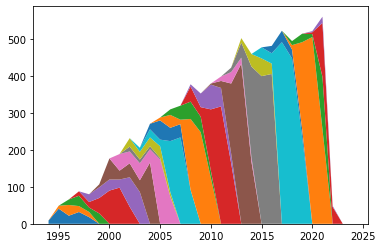

In [7]:
# Teścik
setup = load_yaml(open("simulation.yml"))
the_world = creator.create(**setup)
the_world.run_until(setup["end_time"])
plot_sales(the_world)

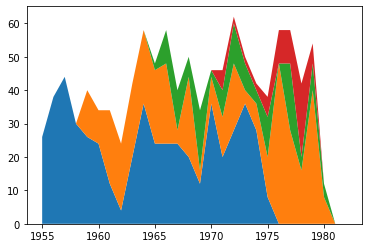

In [17]:
the_world = creator.create(**{
    "start_time": date(1955, 1, 1),
    "mainframes_timeline": "GA_Dates-old.csv",
    "players": [
        {
            "ai": "GROWING_MARKOV",
            "ai_params": {
                "p_engage": 0.01,
                "p_grow": 0.01,
                "p_renew": 0.1,
                "p_resign": 0.4,
                "init_size": 2,
                "growth": 4,
            },
            "ncopies": 100
        }
    ]
})
the_world.run_until(date(1980, 1, 1))
plot_sales(the_world)